# Age Prediction

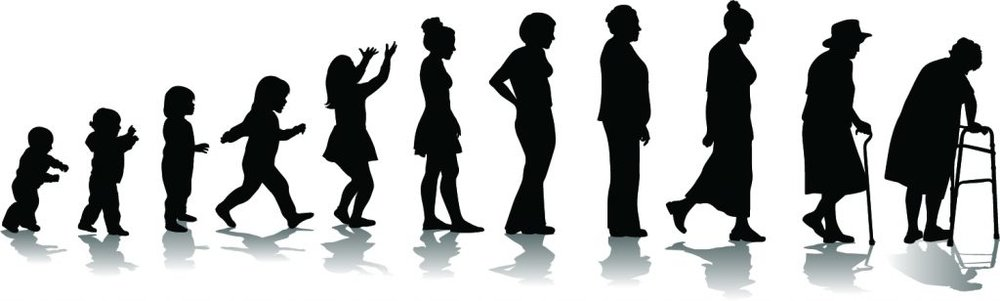
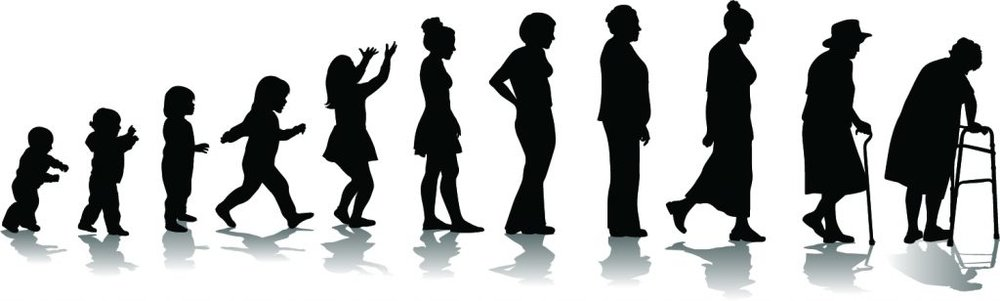

## Aim

The aim of this project is to develop a deep learning model to predict the age of individuals based on images of their faces. Using Convolutional Neural Networks (CNNs), the model will be trained on a dataset of labeled facial images, where each image corresponds to the age of the individual. By extracting key features from these images, the model will learn to estimate the age of new, unseen individuals, enabling the application of the model in various domains such as healthcare, marketing, and personalized services.

## Requirements

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2
import pandas as pd
import os 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score
import math
from tensorflow.keras.models import load_model
from sklearn.metrics import r2_score
from tensorflow.keras import regularizers

## Import Data

In [2]:
df_train=pd.read_csv("/kaggle/input/applications-of-deep-learning-wustl-spring-2024/faces-age/train.csv")

## EDA (Exploratory Data Analysis)

In [3]:
df_train.head()

,id,filename,age
0,1,1.jpg,40
1,2,2.jpg,54
2,3,3.jpg,51
3,4,4.jpg,35
4,5,5.jpg,46


In [4]:
df_train.isnull().sum()

id          0
filename    0
age         0
dtype: int64

In [5]:
df_train.shape

(17999, 3)

In [6]:
df_train['filename']="/kaggle/input/applications-of-deep-learning-wustl-spring-2024/faces-age/"+df_train['filename']

In [7]:
df_train.head()

,id,filename,age
0,1,/kaggle/input/applications-of-deep-learning-wu...,40
1,2,/kaggle/input/applications-of-deep-learning-wu...,54
2,3,/kaggle/input/applications-of-deep-learning-wu...,51
3,4,/kaggle/input/applications-of-deep-learning-wu...,35
4,5,/kaggle/input/applications-of-deep-learning-wu...,46


In [8]:
df_train['age'].value_counts()

age
39    515
37    503
46    487
36    465
35    449
     ... 
79     42
87     34
88     31
89     27
90     20
Name: count, Length: 71, dtype: int64

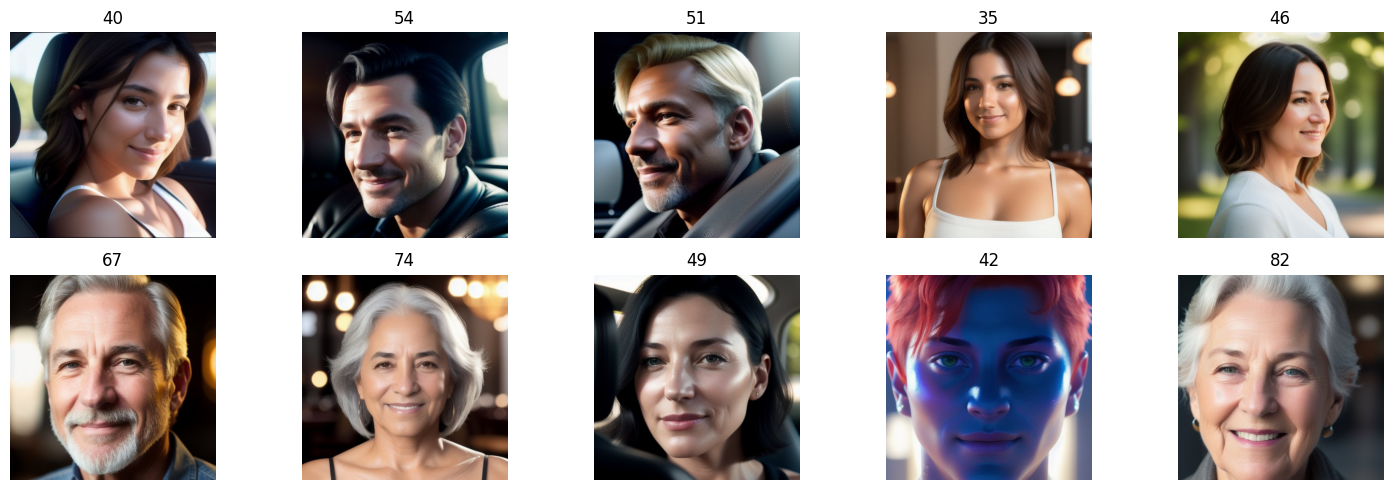

In [9]:
plt.figure(figsize=(15, 5))

for i in range(10):
    sample_img_path = df_train.iloc[i]['filename'] 
    img = cv2.imread(sample_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df_train.iloc[i]['age'])

plt.tight_layout()
plt.show()

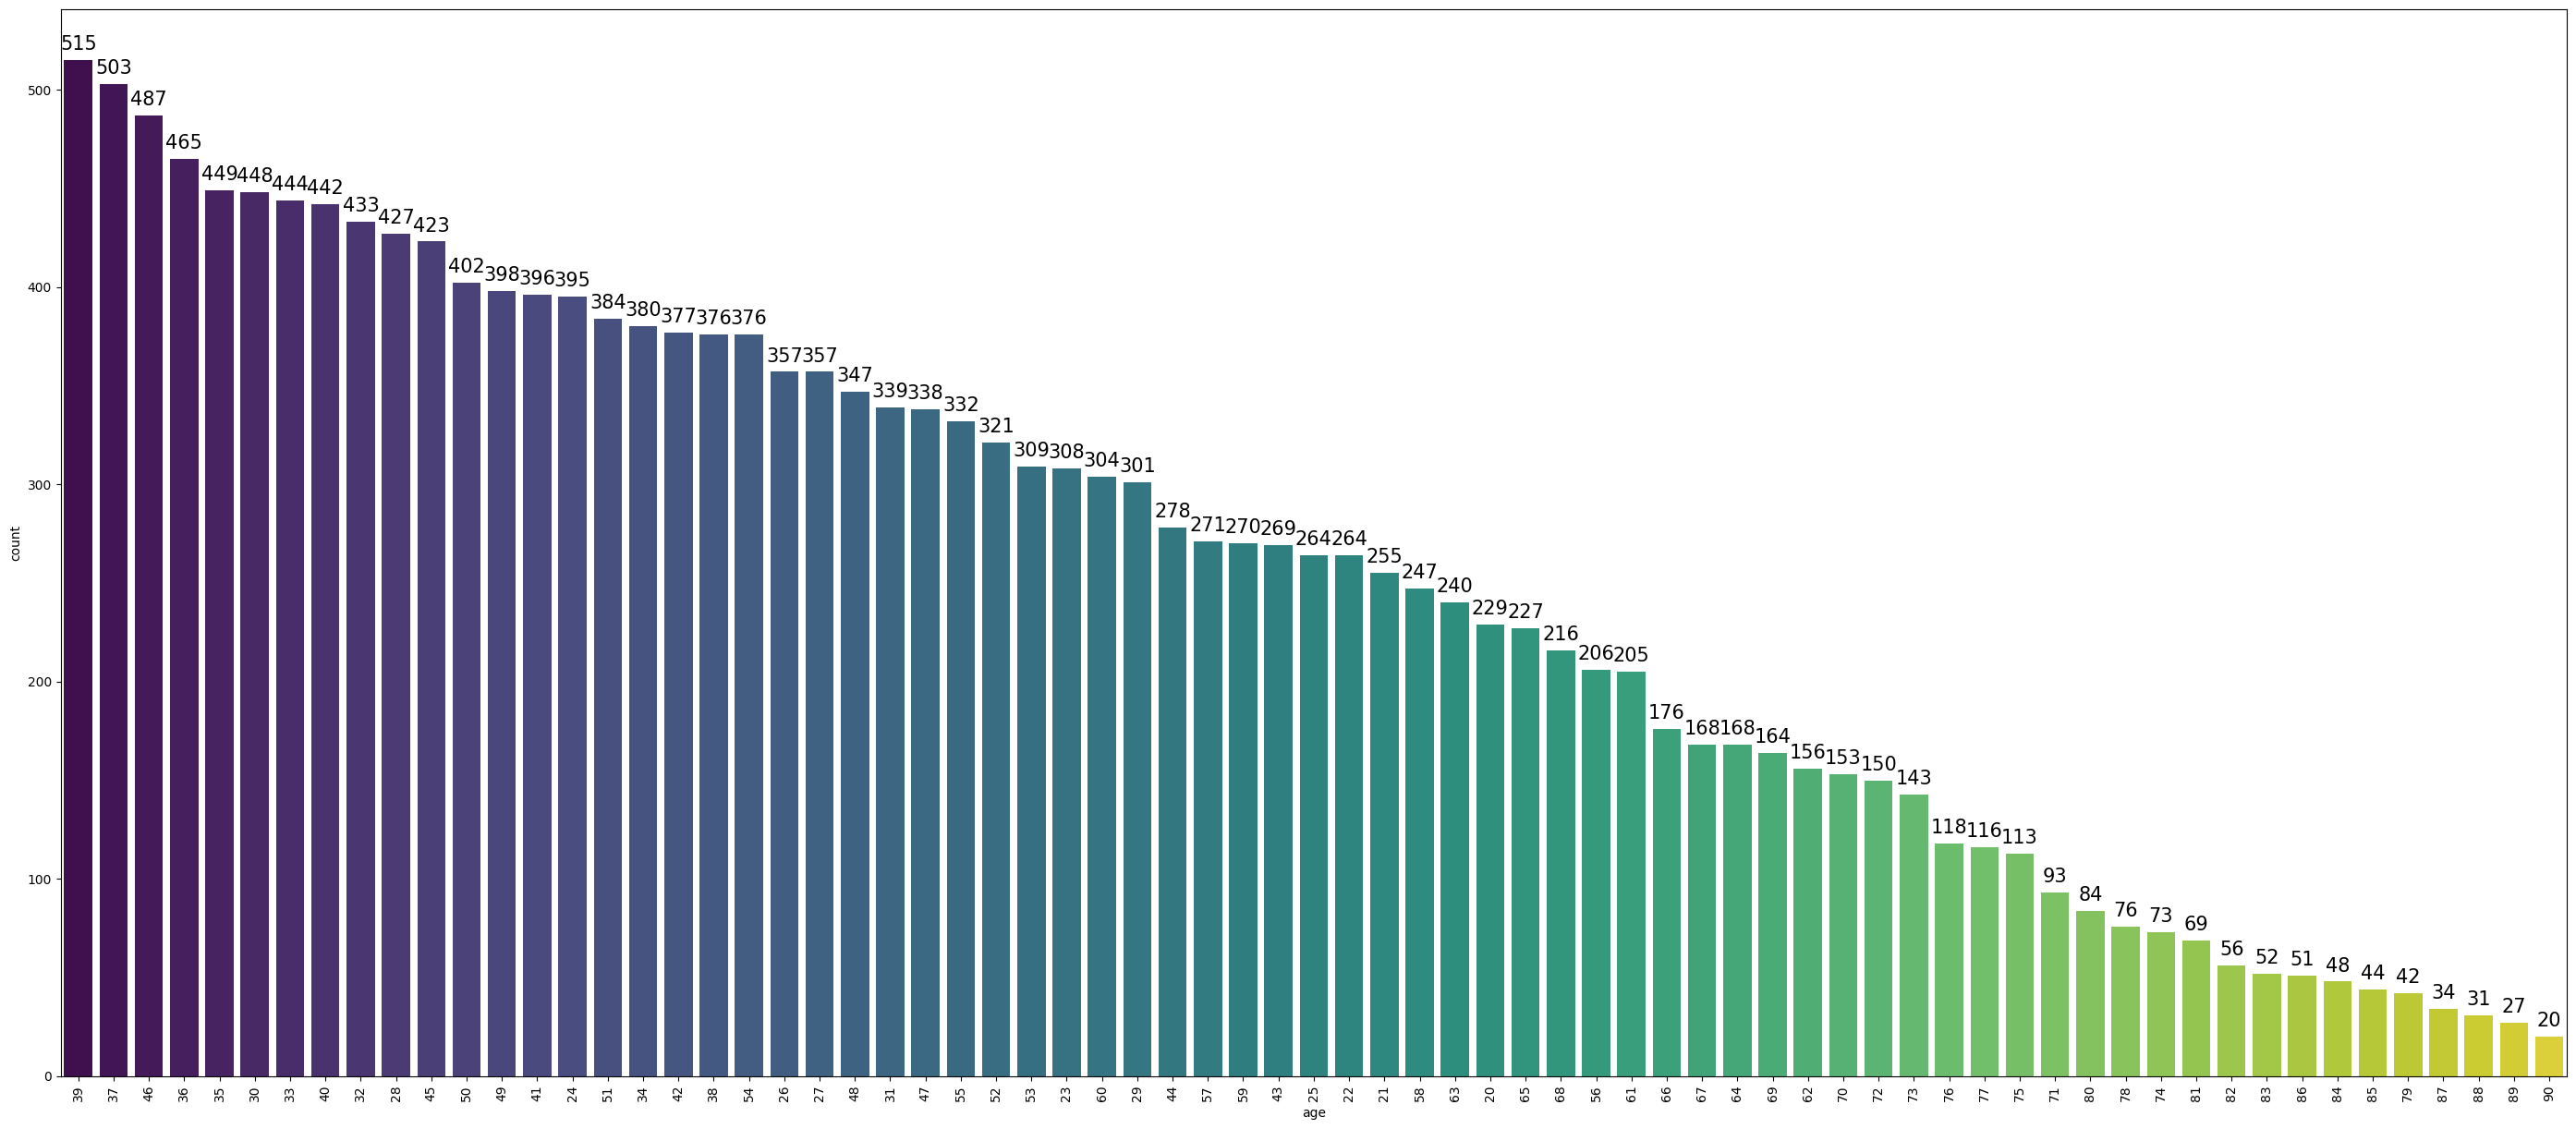

In [10]:
plt.figure(figsize=(35,15))
ax=sns.countplot(x=df_train["age"],palette="viridis",order=df_train['age'].value_counts().index)
for p in ax.containers:
    ax.bar_label(p, fontsize=15, color='black', padding=5)
plt.xticks(rotation=90);

## Preprocess Image

In [11]:
x=[]
for img in df_train['filename']:
    img=cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(128,128))
    img=img/255.0
    x.append(img)
x=np.array(x)

In [12]:
y=df_train[["age"]]

In [13]:
x.shape,y.shape

((17999, 128, 128, 3), (17999, 1))

## Modelling

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [17]:
model = Sequential()

model.add(Input(shape=(128, 128, 3)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1) ) 

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [18]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,985,537 (26.65 MB)

 Trainable params: 6,984,769 (26.64 MB)

 Non-trainable params: 768 (3.00 KB)

In [19]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=36,verbose=1)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 25s 42ms/step - loss: 370.7187 - mae: 14.6290 - mse: 363.0082 - val_loss: 420.7927 - val_mae: 16.8460 - val_mse: 413.9877
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 168.2473 - mae: 10.1231 - mse: 161.6029 - val_loss: 214.6319 - val_mae: 11.5675 - val_mse: 208.4179
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 146.3520 - mae: 9.3330 - mse: 140.2365 - val_loss: 339.6623 - val_mae: 14.9409 - val_mse: 333.8599
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 122.1453 - mae: 8.4408 - mse: 116.4504 - val_loss: 370.3574 - val_mae: 16.0851 - val_mse: 364.9591
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 110.9821 - mae: 8.0964 - mse: 105.6618 - val_loss: 116.5772 - val_mae: 8.2394 - val_mse: 111.5005
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 97.5881 - mae: 7.5014 - mse: 92.5635 - val_loss: 199.8235 - val_mae: 11.3031 - val_mse: 195.0198
Epoch 7/100
400/400 ━━━━━━━━━━━

In [20]:
model.save("cnn_model.h5")

## Model Interpretation

In [21]:
history.history['mae'][-1] 

1.5234578847885132

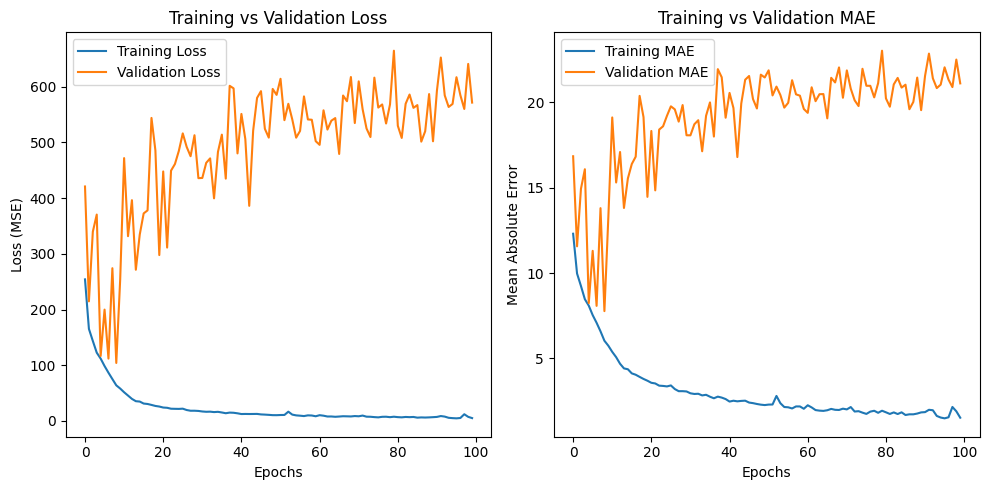

In [22]:
plt.figure(figsize=(10, 5))

# Plot Mean Squared Error (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot Mean Absolute Error (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Training vs Validation MAE")
plt.legend()

plt.tight_layout()
plt.show()

## Testing the Model

In [25]:
df_test=pd.read_csv("/kaggle/input/applications-of-deep-learning-wustl-spring-2024/faces-age/test.csv")

In [26]:
df_test['filename']="/kaggle/input/applications-of-deep-learning-wustl-spring-2024/faces-age/"+df_test['filename']

In [27]:
df_test.head()

,id,filename
0,18000,/kaggle/input/applications-of-deep-learning-wu...
1,18001,/kaggle/input/applications-of-deep-learning-wu...
2,18002,/kaggle/input/applications-of-deep-learning-wu...
3,18003,/kaggle/input/applications-of-deep-learning-wu...
4,18004,/kaggle/input/applications-of-deep-learning-wu...


In [28]:
x_test=[]
for img in df_test['filename']:
    img=cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(128,128))
    img=img/255.0
    x_test.append(img)
x_test=np.array(x_test)

In [29]:
predictions = model.predict(x_test)  
predictions = np.round(predictions).astype(int)  
predictions = predictions.flatten()

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [30]:
predictions

array([29, 23, 21, ..., 24, 11, 16])

In [31]:
submission=pd.DataFrame({
    'id':df_test['id'],
    'age':predictions
})

In [32]:
submission.head()

,id,age
0,18000,29
1,18001,23
2,18002,21
3,18003,23
4,18004,19


In [33]:
submission.to_csv('submission.csv',index=False)